In [15]:
from fuel.streams import DataStream
from fuel.schemes import SequentialScheme, ShuffledScheme
from fuel.datasets.hdf5 import H5PYDataset
from fuel.server import start_server
from fuel.transformers import Flatten, ScaleAndShift
from fuel.transformers.image import  Random2DRotation
#from fuel.transformers.video import RescaleMinDimension
import matplotlib.pyplot as plt
%matplotlib inline 
import random
import sys
import math
sys.path.append('../functions/')
from custom_transformers import RandomDownscale, RandomFixedSizeCrop, RandomRotate, Normalize, Cast, FixedSizeCrop

In [9]:
valid_set = H5PYDataset(
	'../../data/data_1.hdf5',
	which_sets=('train',),
	subset=slice(20000, 22424), #450
)
stream = DataStream.default_stream(
    valid_set,
    iteration_scheme=ShuffledScheme(valid_set.num_examples, 10)
)
stream = RandomRotate(stream, math.pi/10)
stream = Normalize(stream)
stream = Cast(stream, 'floatX')

In [10]:
# extract data
epoch_it = stream.get_epoch_iterator()
data     = epoch_it.next()

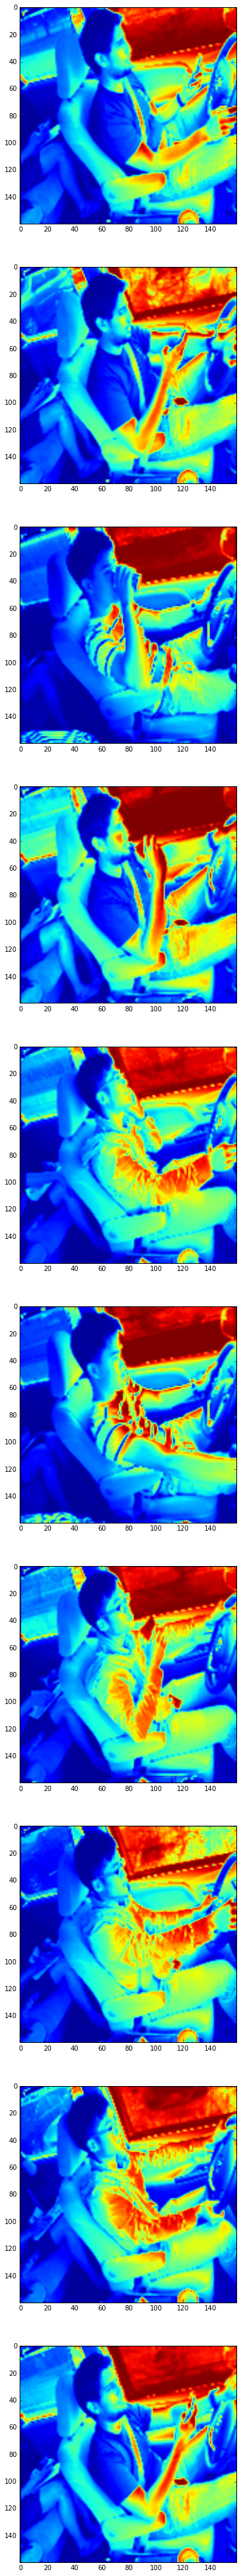

In [11]:
plt.figure(figsize=(30,70))
for i in range(10):
    plt.subplot(10, 1, i+1)
    plt.imshow(data[1][i])


1.57079632679


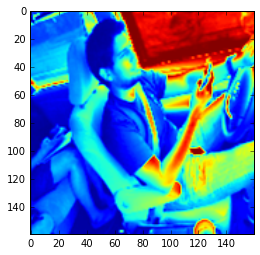

In [36]:
maximum_rotation = math.pi/2
print maximum_rotation

example = data[1][i]
plt.imshow(example)

0.202909216131


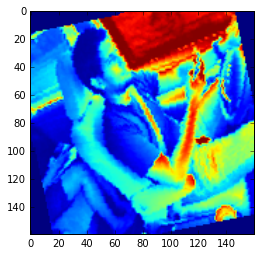

In [50]:
from PIL import Image
import numpy

rotation_angle = random.uniform(-maximum_rotation, maximum_rotation)
print rotation_angle

im = Image.fromarray(example)
example_bis = numpy.array(im.rotate(rotation_angle/math.pi*180)).astype(example.dtype)

plt.imshow(example_bis)

In [5]:
train_set = H5PYDataset(
	'../../data/data.hdf5',
	which_sets=('train',),
	subset=slice(0, 20000), #450
)
train_stream = DataStream.default_stream(
    train_set,
    iteration_scheme=ShuffledScheme(train_set.num_examples, 10)
)
train_normalised_stream = Normalize(train_stream)
train_casted_stream     = Cast(train_normalised_stream, 'floatX')

IOError: Unable to open file (Unable to open file: name = '../../data/data.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [ ]:
# extract data
train_epoch_it = train_casted_stream.get_epoch_iterator()
train_data     = epoch_it.next()

In [ ]:
plt.figure(figsize=(30,70))
for i in range(10):
    plt.subplot(10, 1, i)
    plt.imshow(train_data[0][i][:,:,::-1])